In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
# import matplotlib
# matplotlib.rcParams.update({'font.size':18})
# matplotlib.rcParams.update({'font.family':'serif'})

# https://github.com/dhaitz/mplcyberpunk
import mplcyberpunk
plt.style.use("cyberpunk")

In [4]:
# i'm lazy, so i just grabbed the bingo numbers out of the top of the file 
# to avoid having to make 2 read

nums = [87,7,82,21,47,88,12,71,24,35,10,90,4,97,30,55,36,74,19,50,23,46,13,44,69,27,
        2,0,37,33,99,49,77,15,89,98,31,51,22,96,73,94,95,18,52,78,32,83,85,54,75,84,
        59,25,76,45,20,48,9,28,39,70,63,56,5,68,61,26,58,92,67,53,43,62,17,81,80,66,
        91,93,41,64,14,8,57,38,34,16,42,11,86,72,40,65,79,6,3,29,60,1]
len(nums)

100

<IPython.core.display.Javascript object>


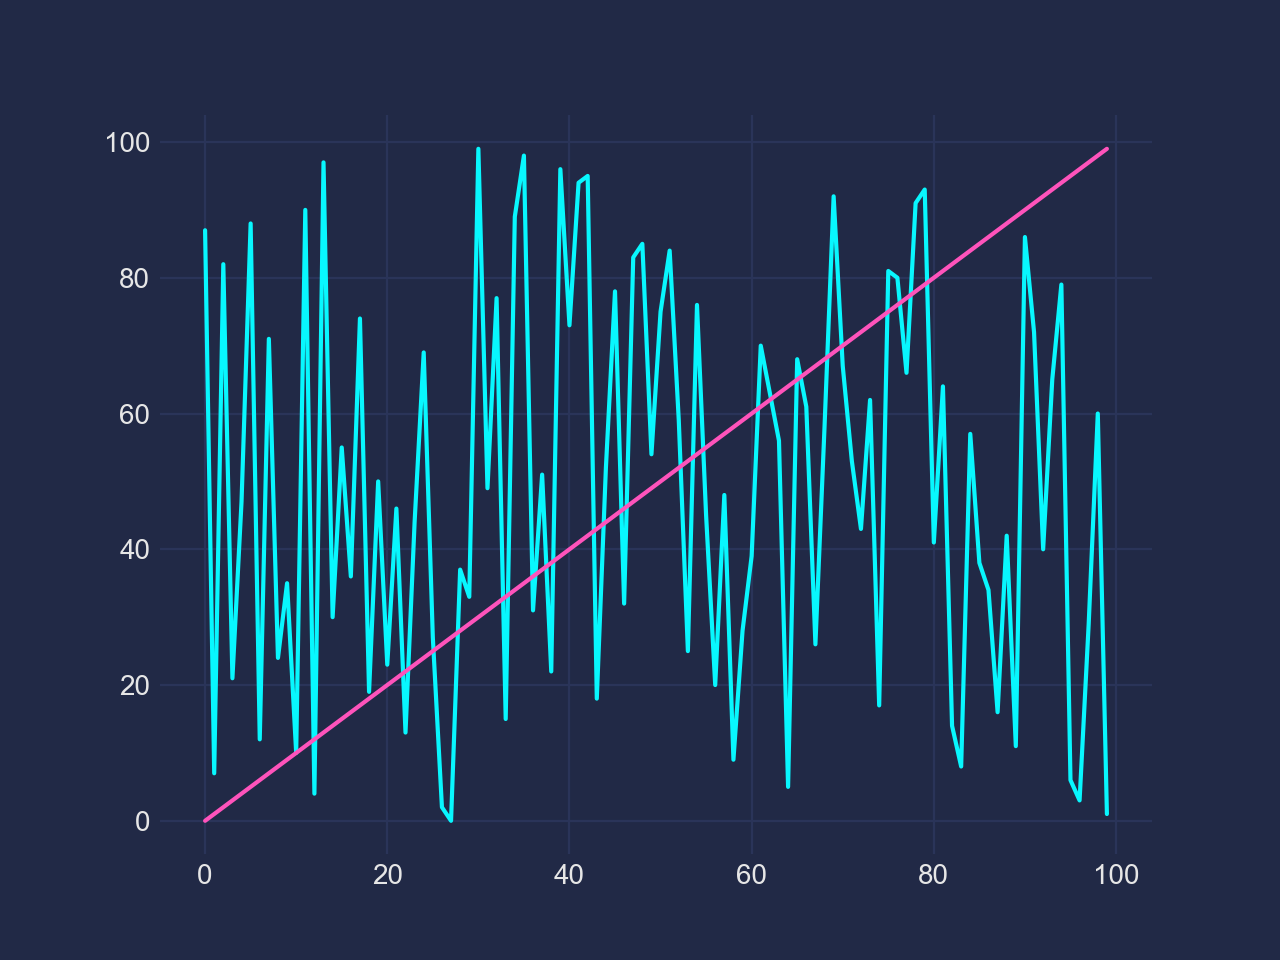

In [38]:
plt.plot(nums)
plt.plot(np.array(nums)[np.argsort(nums)])

In [66]:
file = 'input.txt'
df = pd.read_table(file, names=['a','b','c','d','e'], skiprows=1,
                   delim_whitespace=True, dtype={'dr': int})
df.shape
# 100 boards, 5x5

(500, 5)

In [67]:
boards = df.to_numpy()
boards.shape

(500, 5)

## Puzzle 1

In [137]:
# we're going to first play Bingo, step thru the 100 numbers until winners are found

# array to hold the bingo marker state on all 100 boards
marker = np.zeros(boards.shape)
# marker.shape

wins = np.zeros(int(boards.shape[0]/5))
# wins.shape

# step thru all bingo numbers being called
i=-1
while sum(wins > 0) < 1:
    i+=1
    print(i, nums[i])
    # set the marker for this number
    marker[boards == nums[i]] = 1

    # loop over all the boards, look for any winners
    for k in range(int(boards.shape[0]/5)):
        bk = boards[k*5 : (k+1)*5,:]
        mk = marker[k*5 : (k+1)*5,:]
        # check columns
        if sum(np.sum(mk, axis=0) == 5) > 0:
            wins[k] += 1 # if there's a winner on this board, add 1 to the win score for this board
        # check columns
        if sum(np.sum(mk, axis=1) == 5) > 0:
            wins[k] += 1 # if there's a winner on this board, add 1 to the win score for this board
print(i)

0 87
1 7
2 82
3 21
4 47
5 88
6 12
7 71
8 24
9 35
10 10
11 90
12 4
13 97
14 30
15 55
16 36
17 74
18 19
19 50
20 23
21 46
22 13
23 44
24 69
25 27
26 2
27 0
28 37
29 33
30 99
30


In [138]:
k = np.where((wins > 0))[0]
k=k[0]

bk = boards[k*5 : (k+1)*5,:]
mk = marker[k*5 : (k+1)*5,:]

# score is the sum of all unmarked #s
# multiplied by the last number that was called

np.sum(bk[mk == 0]) * nums[i]

89001

## Puzzle 2

In [174]:
# we're going to first play Bingo, step thru the 100 numbers until winners are found

# array to hold the bingo marker state on all 100 boards
marker = np.zeros(boards.shape)
# marker.shape

wins = np.zeros(int(boards.shape[0]/5))
# wins.shape

# step thru all bingo numbers being called
i=-1
# run until there is ONE board left
while sum(wins > 0) < (wins.shape[0] - 1):
    i+=1
#     print(i, nums[i])
    # set the marker for this number
    marker[boards == nums[i]] = 1

    # loop over all the boards, look for any winners
    for k in range(int(boards.shape[0]/5)):
        bk = boards[k*5 : (k+1)*5,:]
        mk = marker[k*5 : (k+1)*5,:]
        # check columns
        if sum(np.sum(mk, axis=0) == 5) > 0:
            wins[k] += 1 # if there's a winner on this board, add 1 to the win score for this board
        # check columns
        if sum(np.sum(mk, axis=1) == 5) > 0:
            wins[k] += 1 # if there's a winner on this board, add 1 to the win score for this board
print(i)

81


In [175]:
# which board is left
k = np.where((wins == 0))[0]
k=k[0]

# now run until THAT board wins
while wins[k] < 1:
    i+=1
    # set the marker for this number
    marker[boards == nums[i]] = 1

    bk = boards[k*5 : (k+1)*5,:]
    mk = marker[k*5 : (k+1)*5,:]
    # check columns
    if sum(np.sum(mk, axis=0) == 5) > 0:
        wins[k] += 1 # if there's a winner on this board, add 1 to the win score for this board
    # check columns
    if sum(np.sum(mk, axis=1) == 5) > 0:
        wins[k] += 1 # if there's a winner on this board, add 1 to the win score for this board
    print(i, nums[i], wins[k])
    
# score is the sum of all unmarked #s
# multiplied by the last number that was called

np.sum(bk[mk == 0]) * nums[i]
# mk

82 14 0.0
83 8 0.0
84 57 0.0
85 38 2.0


7296